# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.053252e+01     6.972556e+00
 * time: 0.044621944427490234
     1     2.786953e+01     5.139372e+00
 * time: 0.049646854400634766
     2     1.959385e+01     5.120651e+00
 * time: 0.05618000030517578
     3     1.339983e+01     3.468020e+00
 * time: 0.06233406066894531
     4     1.301424e+01     4.394276e+00
 * time: 0.06725382804870605
     5     1.215858e+01     2.338695e+00
 * time: 0.07346391677856445
     6     1.043702e+01     1.787581e+00
 * time: 0.07854890823364258
     7     9.150398e+00     1.418529e+00
 * time: 0.08369302749633789
     8     8.584705e+00     8.419950e-01
 * time: 0.08936500549316406
     9     8.397676e+00     5.751055e-01
 * time: 0.09509992599487305
    10     8.381841e+00     1.430869e+00
 * time: 0.09900283813476562
    11     8.333129e+00     8.112512e-01
 * time: 0.10354399681091309
    12     8.268050e+00     4.737268e-01
 * time: 0.10754203796386719
    13     8.212290e+00     4.287258e-01
 * tim

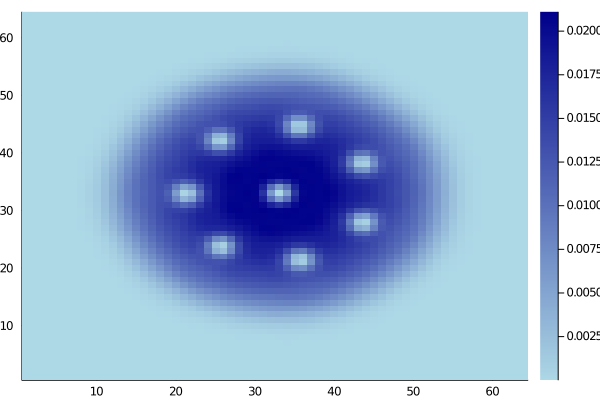

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)